# Homework 4
# Perceptron, SVM, and PCA

# <p style="text-align: right;"> &#9989; Jacob McLees</p>
# <p style="text-align: right;"> &#9989; mcleesja</p>

# Goal for this homework assignment
We have worked some basics on perceptron, SVM, and PCA in the pre-class and in-class assignments. In this homework assignment, we will:

* Continue to use git as the version control tool
* Work on unfamiliar data
* Use perceptron to classify data 
* Use SVM to classify data
* Use principal component analysis to facilitate classification


**This assignment is due by 11:59 pm on Friday, April 25th. Note that ONLY the copy on GITHUB will be graded.**  **There are 60 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.

---
# Part 1: Git repository (6 points)

You're going to add this assignment to the `cmse202-s25-turnin` repository you previously created. The history of progress on the assignment will be tracked via git commitments. 

**&#9989; Do the following**:

1. Navigate to your `cmse202-s25-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository. 

5. Double check to make sure your file is at the correct directory.

6. Once you're certain that file and directory are correct, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04` to push your file to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

<font size=6 color="#009600">&#9998;</font> git clone https://github.com/mcleesja/CMSE202-f25-turnin1.git

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s25-turnin`" repository inside the `hw-04` directory that you just created.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.

---
# Part 2: Deal with unfamiliar data (35 points)

## Warm up with perceptron for binary classification
## 2.1 Load up the dataset

This data is obtained from Kaggle/diabetes. It contains multiple measured values and a label for whether the patient is diagnosed as diabetic. 

* Use commands to dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv`
* Use Pandas to load in the data and briefly examine it.
* Succeed data load-up gets **2 pt**. 

In [1]:
# put your code here
import pandas as pd
data = pd.read_csv("diabetes_prediction_dataset.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [2]:
data.shape

(100000, 9)

In [3]:
data.describe() 

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
data.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

How many patients are in this dataset? What are features of the patients?

<font size=6 color="#009600">&#9998;</font> 100000 patients. Features include: gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level and diabetes.

### Use your perceptron class built in Day18 and Day19 assignments to classify whether patients are diabetic.

* You should see that there are some features that are non-numerics.
* The first one is `gender`. Find the types of classes and convert them to numerics in your dataframe.
* The second one is `smoking_history`, convert those string labels to numerics.
* Note that since perceptron is a binary classifier, which only determines which side of the dividing line the data points reside, we should also convert the labels to `+1` and `-1`.
* Completing data conversion gets **5 pt**.

In [6]:
print(data['gender'].unique())
print(data['smoking_history'].unique())
print(data['diabetes'].unique())

['Female' 'Male' 'Other']
['never' 'No Info' 'current' 'former' 'ever' 'not current']
[0 1]


In [2]:
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
data['smoking_history'] = data['smoking_history'].astype('category').cat.codes
data['diabetes'] = data['diabetes'].apply(lambda x: 1 if x == 1 else -1)
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,4,25.19,6.6,140,-1
1,1,54.0,0,0,0,27.32,6.6,80,-1
2,0,28.0,0,0,4,27.32,5.7,158,-1
3,1,36.0,0,0,1,23.45,5.0,155,-1
4,0,76.0,1,1,1,20.14,4.8,155,-1


### Now all feature varilables are numerics.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---

## 2.2 Binary perceptron classifier

Copy your perceptron class to the cell below. 

* DO NOT use the one from statsmodel. We want to test the perceptron you built.
* Note that your predict method should output `+1` or `-1` for positive or negative values, respectively.
* A functional perceptron classifier gets **4 pt**.

In [3]:
# copy your perceptron class to his cell
class Perceptron1:
    def __init__(self, labeled_data, iterations, learning_rate):        
        self.data = []
    
        for row in labeled_data:
            features = row[:-1]
            label = row[-1]
            self.data.append(features + [label])  # Already numeric
    
        if not self.data:
            raise ValueError("No data found in self.data!")
    
        n_features = len(self.data[0]) - 1
        self.weights = np.ones(n_features + 1)
        self.iterations = iterations
        self.learning_rate = learning_rate

    def predict(self, feature_set):
        dot = np.dot(self.weights[1:], feature_set)
        result = self.weights[0] + dot
        return 1 if result >= 0 else -1

    def fit(self):
        for _ in range(self.iterations):
            for row in self.data:
                features = row[:-1]
                label = row[-1]
                prediction = self.predict(features)
                error = label - prediction
                self.weights[0] += self.learning_rate * error
                for i in range(len(features)):
                    self.weights[i + 1] += self.learning_rate * error * features[i]

    def errors(self):
        total_errors = 0
        for row in self.data:
            features = row[:-1]
            label = row[-1]
            prediction = self.predict(features)
            if prediction != label:
                total_errors += 1
        return total_errors

* Split data to 70-30 train-test sets **1 pt**.
* Train your perceptron.
* Show the accuracy of your pereptron **2 pt**.

In [4]:
# put your code here
from sklearn.model_selection import train_test_split
X = data.drop(columns=['diabetes'])
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(70000, 8) (30000, 8)
(70000,) (30000,)


In [5]:
import numpy as np
train_data = X_train.copy()
train_data['diabetes'] = y_train
train_data_list = train_data.values.tolist()

perceptron = Perceptron1(labeled_data=train_data_list, iterations=10, learning_rate=0.01)
perceptron.fit()
print("Total training errors:", perceptron.errors())

Total training errors: 5944


* Use test set to evaulate the accuracy of your perceptron. What is your accuracy? (**2 pt**)

In [6]:
# put your code here
X_test_array = X_test.values
y_test_array = y_test.values
correct = 0
total = len(X_test_array)

for i in range(total):
    features = X_test_array[i]
    true_label = y_test_array[i]
    prediction = perceptron.predict(features)
    
    if prediction == true_label:
        correct += 1

# 3. Calculate accuracy
test_accuracy = correct / total
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9152


* There may be some ways to increase the accruacy, such as increasing the number of train iterations or adjust learning rate. Give a try to train a perceptron you can best get. Record the values of parameters and the optimal accuracy. (**3 pt**)


In [7]:
# put your code here
perceptron1 = Perceptron1(labeled_data=train_data_list, iterations=10, learning_rate=0.05)
perceptron1.fit()
print("Total training errors:", perceptron1.errors())
X_test_array = X_test.values
y_test_array = y_test.values
correct = 0
total = len(X_test_array)

for i in range(total):
    features = X_test_array[i]
    true_label = y_test_array[i]
    prediction = perceptron1.predict(features)
    
    if prediction == true_label:
        correct += 1

# 3. Calculate accuracy
test_accuracy = correct / total
print("Test Accuracy:", test_accuracy)

Total training errors: 5729
Test Accuracy: 0.9181


I slightly improved the accuracy with these parameters:
iterations = 10
learning_rate = 0.05

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

### 2.3 Next we shall test perceptron's capability of multiple-label classification.

* Dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv`.
* This is a customer category dataset (Kraggle/Customer Classification). Each cusmtoer has several feature variables.
* There are five categories of customers, which are non-numerics. Thus, let's convert those string labels to numerics.
* Successful data load-up gets **2 pt**.

In [11]:
# Download and load the dataset. Convert non-numerical labels to numerics.
# put your code here
dataset = pd.read_csv("Telecust1.csv")
dataset.head()
dataset['custcat'] = dataset['custcat'].astype('category').cat.codes
dataset.head()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,0
1,3,11,33,136,1,7,5,5,0,0,6,3
2,3,68,52,116,1,24,1,29,0,1,2,2
3,2,33,33,33,0,12,2,0,0,1,1,0
4,2,23,30,30,1,9,1,2,0,0,4,2


---
### 2.4 Multi-label perceptron classification

* As we know, perceptron is a binary classifier. For multiple-label classification, we can use One-vs-Rest (OvR) Strategy.
* In this case, let's train five individual perceptrons. 
* For each classifier, it treats the current class as "positive" and all others as "negative."
* When classifying a new sample, each classifier gives a "score," and the class with the highest score is chosen.

Copy your perceptron to the code cell below. We need to add a score method, which outputs dot of weights and features, as opposed to the previous binary predict method. The score method should output a signed floating score value, not `+1` or `-1`. This can be done by removing the binary segmenting, i.e., directly outputing the dot value.

* Functioning score() method gets **2 pt**.

In [12]:
# put your modified perceptron class here

class Perceptron1:
    def __init__(self, labeled_data, iterations, learning_rate):
        self.data = []

        for row in labeled_data:
            features = row[:-1]
            label = row[-1]
            self.data.append(features + [label])  # already numeric

        if not self.data:
            raise ValueError("No data found in self.data!")

        n_features = len(self.data[0]) - 1
        self.weights = np.ones(n_features + 1)  # weights[0] is bias
        self.iterations = iterations
        self.learning_rate = learning_rate

    def score(self, feature_set):
        # This is the raw score: w0 (bias) + dot(w, x)
        return self.weights[0] + np.dot(self.weights[1:], feature_set)

    def predict(self, feature_set):
        result = self.score(feature_set)
        return 1 if result >= 0 else -1

    def fit(self):
        for _ in range(self.iterations):
            for row in self.data:
                features = row[:-1]
                label = row[-1]
                prediction = self.predict(features)
                error = label - prediction
                self.weights[0] += self.learning_rate * error  # update bias
                for i in range(len(features)):
                    self.weights[i + 1] += self.learning_rate * error * features[i]

    def errors(self):
        total_errors = 0
        for row in self.data:
            features = row[:-1]
            label = row[-1]
            prediction = self.predict(features)
            if prediction != label:
                total_errors += 1
        return total_errors

* Now let's do a train-test split of the data with a test_size = 0.3.
* Since we are training 5 perceptrons, we should have have 5 class label sets. For instance, in the label set for category A, the label value will be `+1` if it's type A and otherwise `-1`.
* Setting label sets gets **4 pt**.

In [16]:
# put your code here
X = dataset.drop(columns=['custcat']).values
y = dataset['custcat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
class_labels = np.unique(y_train)

ovr_labels = {}
for label in class_labels:
    # +1 if current class, -1 otherwise
    binary_labels = np.where(y_train == label, 1, -1)
    ovr_labels[label] = binary_labels

* Use training set and the 5 training label sets to train your 5 perceptrons. Report the accuracy of those five training.
* Efficiently train the five perceptrons using nest loop gets **5 pt**.


In [17]:
# put your code here
perceptrons = {}
training_accuracies = {}

# Outer loop: for each class label (0, 1, 2, 3, 4)
for label in class_labels:
    # Create training data: features + corresponding binary labels
    train_data = np.hstack((X_train, ovr_labels[label].reshape(-1, 1)))
    train_data_list = train_data.tolist()
    
    # Train the perceptron
    p = Perceptron1(labeled_data=train_data_list, iterations=10, learning_rate=0.01)
    p.fit()
    perceptrons[label] = p
    
    correct = 0
    for row in train_data_list:
        features = row[:-1]
        true_label = row[-1]
        prediction = p.predict(features)
        if prediction == true_label:
            correct += 1
    accuracy = correct / len(train_data_list)
    training_accuracies[label] = accuracy
    
for label in class_labels:
    print(f"Training Accuracy for class {label}: {training_accuracies[label]:.4f}")

Training Accuracy for class 0: 0.6786
Training Accuracy for class 1: 0.7400
Training Accuracy for class 2: 0.7171
Training Accuracy for class 3: 0.6943


* Use the test vector to examine the accuracy.
* For each feature set, there should be 5 output scores, each from a perceptron. The predicted label should be the label that corresponds to the highest score.
* Report your accuracy. (**3 pt**)

In [19]:
# put your code here
correct = 0
total = len(X_test)

for i in range(total):
    feature_set = X_test[i]
    scores = {}
    for label in class_labels:
        scores[label] = perceptrons[label].score(feature_set)
    
    
    predicted_label = max(scores, key=scores.get)
    if predicted_label == y_test[i]:
        correct += 1

test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.3500


How good is your multiple-label perceptron classification?

<font size=6 color="#009600">&#9998;</font> It is better than random guessing but not great, with a test accuracy of 0.35


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
## Part 3 SVM classifiers (19 points)

### 3.1 SVM 

Let's re-use the customer category data. There are five caterogies with multiple feature variables.

* Use sklearn library to build a SVM classifier. Since we do not know what the best parametes are, perform a GridSearch for best parameters.
* NOTE: Because the dataset contains a large number of points, it's expected to have a long computer running time for GridSearch. Thus, let's use only the first 200 data points for GridSearch. You can start the grid search parameter like the image below. However, **NOTE** that if the kernal used cannot find a hyperplane to classify data points, the GridSearch function will stall. You need to manually remove that kernal from the parameter set and re-run GridSearch.
  
<img src="https://i.ibb.co/JWrp6c4q/Grid-Search-Param.png" width="650">


* As in the previous section, make a 70-30 train-test split and train your SVM classifier.
* Complete GridSearch to extract best parameters gets **5 pt**.

In [21]:
# put your code here.
df_small = dataset.head(200)
X_small = df_small.drop(columns=['custcat'])
y_small = df_small['custcat']
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.3, random_state=42)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [1e-2, 1e-1, 1, 10],
    'gamma': [1e-4, 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=3, verbose=1)
clf.fit(X_train, y_train)
print("Best Parameters from GridSearch:")
print(clf.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best Parameters from GridSearch:
{'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}


* Examine the accuracy of this SVC and report the accuracy. Draw a confusion matrix. **2 pt**

In [22]:
# put your code here
from sklearn.metrics import accuracy_score

# Predict with the best model from GridSearch
y_pred = clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with best SVM: {accuracy:.4f}")

Test Accuracy with best SVM: 0.4167


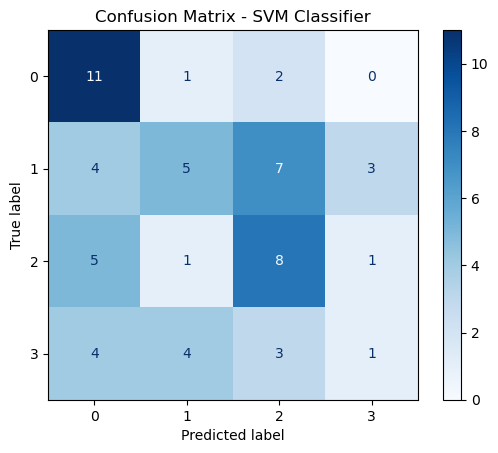

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVM Classifier")
plt.show()

Does SVM classifier work much better than your percetron?

<font size=6 color="#009600">&#9998;</font> The SVM classifier performs somewhat better than the Perceptron, achieving a test accuracy of 41.67% compared to 35.00% for the Perceptron.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
### 3.2 PCA 

Although we only have 11 feature variables in the dataset, let's examine how much principal component analysis (PCA) can accelerate the classification. We will increase the PCA components from 1 to 11. For each case, we will perform a GridSearch and use test set to examine the accuracy. 

* Write a code to loop over n_components = 1 through 11. **4 pt**
* Record the accuracy of each case and plot the profile of accuracy versus n_components. In the mean time, record the computer run times and plot the profile of time versus n_components. **2 pt**




Running for n_components = 1
Accuracy: 0.3167, Time: 6.53 sec
Running for n_components = 2
Accuracy: 0.3367, Time: 15.00 sec
Running for n_components = 3
Accuracy: 0.3600, Time: 9.69 sec
Running for n_components = 4
Accuracy: 0.3667, Time: 13.62 sec
Running for n_components = 5
Accuracy: 0.3767, Time: 13.06 sec
Running for n_components = 6
Accuracy: 0.3767, Time: 22.35 sec
Running for n_components = 7
Accuracy: 0.4000, Time: 16.90 sec
Running for n_components = 8
Accuracy: 0.4133, Time: 31.18 sec
Running for n_components = 9
Accuracy: 0.4067, Time: 55.99 sec
Running for n_components = 10
Accuracy: 0.3800, Time: 45.83 sec
Running for n_components = 11
Accuracy: 0.3800, Time: 53.05 sec


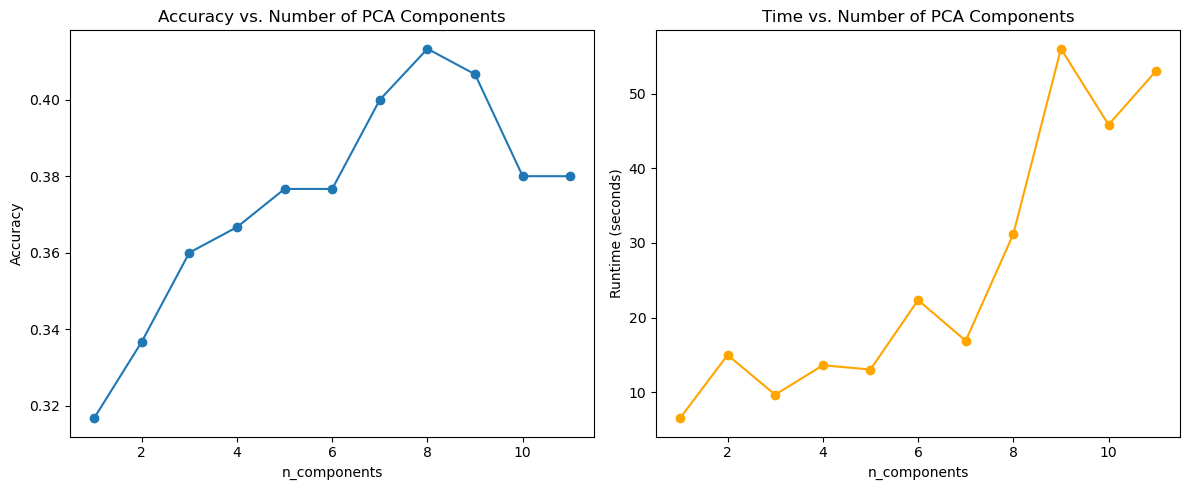

In [25]:
# put your code here
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
X = dataset.drop(columns=['custcat']).values
y = dataset['custcat'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1],
    'gamma': [0.0001, 0.001, 0.01],
    'kernel': ['linear']  
}
accuracies = []
times = []
for n in range(1, 12): 
    print(f"Running for n_components = {n}")
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    start_time = time.time()
    clf = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=3)
    clf.fit(X_train_pca, y_train)
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)
    
    y_pred = clf.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Accuracy: {acc:.4f}, Time: {elapsed_time:.2f} sec")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 12), accuracies, marker='o')
plt.title("Accuracy vs. Number of PCA Components")
plt.xlabel("n_components")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(1, 12), times, marker='o', color='orange')
plt.title("Time vs. Number of PCA Components")
plt.xlabel("n_components")
plt.ylabel("Runtime (seconds)")

plt.tight_layout()
plt.show()


Please answer the following questions. 
* How is the overall accuracy of this SVM classifier?  **1 pt**
* If the performance is not good, what do you think the cause is? **2 pt**

<font size=6 color="#009600">&#9998;</font> The overall accuracy of the SVM classifier after applying PCA varies between approximately 31% and 42%, depending on the number of PCA components used. The best accuracy is observed around 8 components, where the model reaches about 42.5%. 
The performance of the SVM classifier is relatively low, likely due to the data not being linearly separable, which limits the effectiveness of a linear kernel.

* Describe the curves of time vs n_components and accuracy vs n_components. **1 pt**
* Explain why the curves behave as they are in the figures **2 pt**

<font size=6 color="#009600">&#9998;</font> The accuracy vs. n_components curve increases steadily from 1 to 8 components, reaching a peak around 42%, and then slightly declines or levels off after that. The time vs. n_components curve shows a generally increasing trend, with a sharp rise after 8 components, indicating longer computation times for higher dimensions. As more components are added, PCA retains more information from the original data, which improves classification accuracy up to a point. However, after around 8 components, the added dimensions contribute less new information or may introduce noise, so the performance will peak at a certain point. Runtime increases with more components because the feature space is larger, leading to longer fitting and evaluation times


### &#128721; STOP (1 Point)
**Pause, save and commit your FINAL changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**



In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University